In [17]:
# import requests
# import os

# # 모델의 raw URL을 사용합니다.
# url = 'https://github.com/NostalgicJ/Quantum_2023/raw/test/RNN_Practice/10/saved_models/NVspin_SimpleRNN_model.h5'
# response = requests.get(url, allow_redirects=True)

# # 현재 코드 파일이 위치한 디렉토리의 상위 디렉토리로 이동
# parent_directory = os.path.join(os.getcwd(), '..')

# # 상위 디렉토리에 새로운 디렉토리 생성
# new_directory = os.path.join(parent_directory, 'using_models')

# if not os.path.exists(new_directory):
#     os.makedirs(new_directory)

# # 모델 저장하기
# with open('../using_models/NVspin_SimpleRNN_model.h5', 'wb') as f:
#     f.write(response.content)
    

In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('saved_models/NVspin_SimpleRNN_model.h5')

2023-08-31 17:22:40.583898: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 17:22:40.618304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-31 17:22:40.619334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 17:22:41.266316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-31 17:22:42.089391: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-31 17:22:42.089769: W tensorflow/core/common_r

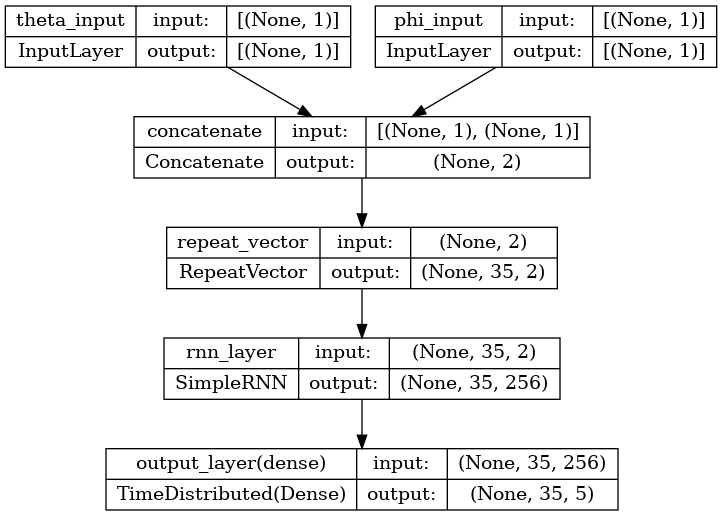

In [4]:
from tensorflow.keras.utils import plot_model
import os

# 저장할 디렉토리 생성
model_dir = 'model_plot'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 원하는 디렉토리 지정
file_name = 'SimpleRNN_model_plot.png'
full_path = os.path.join(model_dir, file_name)

# 모델 구조 시각화
plot_model(loaded_model, to_file=full_path, show_shapes=True, show_layer_names=True)


In [20]:
import numpy as np

# 새로운 theta와 phi 값 정의
new_theta = np.array([np.pi/2]).reshape(-1, 1)  # 예시 값
new_phi = np.array([np.pi]).reshape(-1, 1)    # 예시 값

# 모델로 예측
predicted_sequence = loaded_model.predict([new_theta, new_phi])

# 결과 출력 (예측값은 확률 분포로 나올 것이므로 가장 높은 확률을 가진 인덱스를 선택)
predicted_sequence_indices = np.argmax(predicted_sequence, axis=-1)
print(predicted_sequence_indices[0])

1/1 [==============================] - 0s 145ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 2 4 4 1 1 3 3 2 2 4 4 1 1 3 3 3]


In [21]:
import pandas as pd

# 깃허브에서 CSV 파일 다운로드
csv_url = "https://github.com/NostalgicJ/Quantum_2023/raw/test/Data/using/dt_2.6/ByAstar_dt_2.6_modified.csv"
df = pd.read_csv(csv_url)

shuffled_data = df.sample(frac=1).reset_index(drop=True)
shuffled_data.head()

,gate length,Theta,Phi,dt,combination,total time,computing time
0,0,0.157041,1.380361,2.6,[],0.0,0.003000
1,10,0.681921,3.370523,2.6,"[3, 2, 2, 4, 4, 1, 3, 3, 0, 4]",26.0,31.038900
2,33,2.982864,0.877694,2.6,"[1, 1, 3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, ...",85.8,108.002929
3,18,1.359391,2.469262,2.6,"[3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 4, ...",46.8,507.259394
4,28,2.764455,3.892447,2.6,"[3, 3, 2, 2, 4, 4, 1, 1, 3, 3, 2, 2, 4, 4, 1, ...",72.8,307.145351


In [22]:
# 예측 수행
theta = shuffled_data['Theta'].values.reshape(-1, 1)
phi = shuffled_data['Phi'].values.reshape(-1, 1)
predictions = loaded_model.predict([theta, phi])

# 예측 결과를 원하는 형태로 가공 (예: 가장 확률이 높은 클래스를 선택하는 경우)
predicted_sequences = np.argmax(predictions, axis=-1)  # 이 부분은 예측 결과의 형태와 원하는 출력에 따라 조절이 필요합니다.

# 원본 DataFrame에 예측 결과를 추가
shuffled_data['Predicted'] = list(predicted_sequences)

540/540 [==============================] - 3s 6ms/step


In [23]:
import os

# 저장할 디렉토리 생성
result_dir = 'data_results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# 결과를 CSV 파일로 해당 디렉토리에 저장
output_path = os.path.join(result_dir, "NVspin_SimpleRNN_data_results.csv")
shuffled_data.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: data_results\NVspin_SimpleRNN_data_results.csv
